In [4]:
# Generating Perlin Noise TR
from perlin_noise import PerlinNoise
import numpy as np
import matplotlib.pyplot as plt

(0.0, 1000.0)

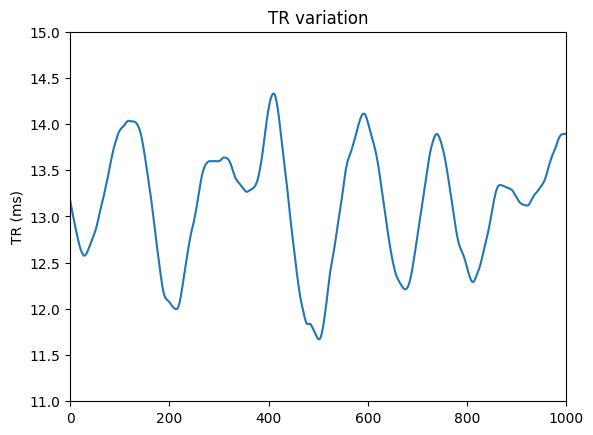

In [6]:
trArray = np.genfromtxt('tr_jiang', delimiter=',', dtype=float)
plt.plot(trArray)
plt.title('TR variation')
plt.ylabel('TR (ms)')
plt.ylim([11,15])
plt.xlim([0,1000])

(0.0, 1000.0)

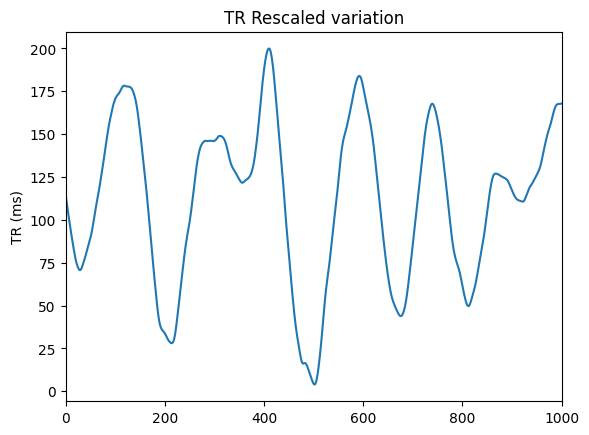

In [8]:
# rescale TR to fall within WEX range from Emma's paper
TR_min = np.min(trArray)
TR_max = np.max(trArray)
TR_min_WEX = 4
TR_max_WEX = 200

TR_rescaled = (trArray - TR_min) / (TR_max - TR_min) * (TR_max_WEX - TR_min_WEX) + TR_min_WEX
plt.plot(TR_rescaled)
plt.title('TR Rescaled variation')
plt.ylabel('TR (ms)')
plt.xlim([0,1000])

## Emma's original variations

In [12]:
a = 13; b = 40
c =181; d = 100; e = 45
noOfRepetitions = 500

xRange = np.linspace(0,noOfRepetitions,num=noOfRepetitions)
#Calculate the sinusoidal array 
trArray = e*np.sin(xRange/c)+(d+e)

#Generate linearly spaced array between 0 and the number repetitions 
xRange = np.array(range(noOfRepetitions))
#Calculate the sinusoidal array 
#Sometimes a random variation is added to the flip angle to reduced 
#effects of matching errors with inhomogeneous B1 fields 
#Hence there is a random element that can be added (set currently to 0)
faArray = np.squeeze(a*(np.abs(3*np.sin(xRange/b)+(np.sin(xRange/b)**2))) \
    +  np.random.uniform(0,0,[1,noOfRepetitions]))

Text(0, 0.5, 'TR (ms)')

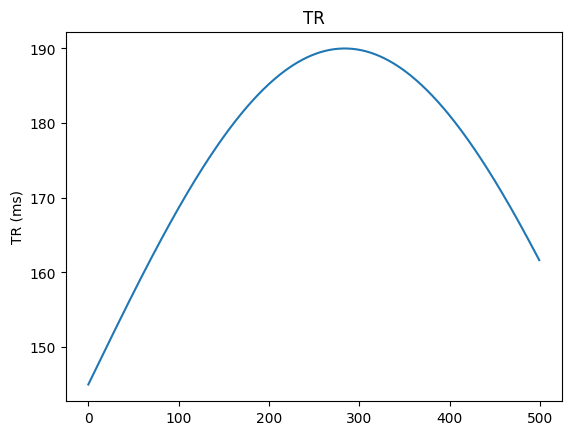

In [13]:
plt.plot(trArray)
plt.title('TR')
plt.ylabel('TR (ms)')

Text(0, 0.5, 'FA (deg)')

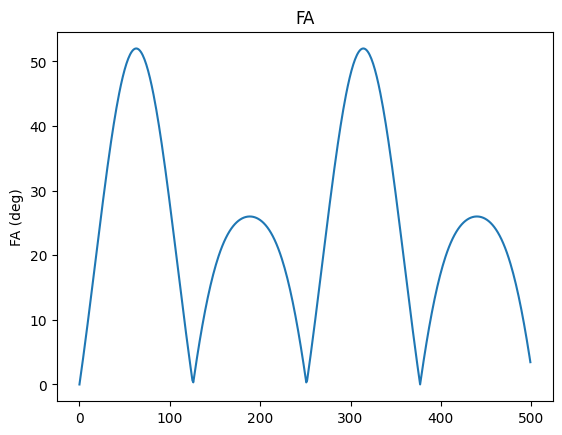

In [15]:
plt.plot(faArray)
plt.title('FA')
plt.ylabel('FA (deg)')

(9000, 10)


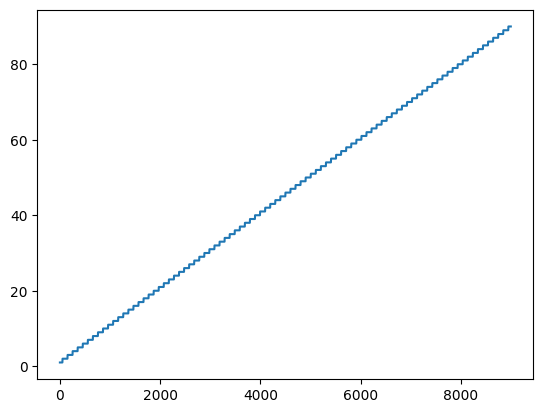

In [4]:
a = np.tile(np.expand_dims(np.round(np.linspace(1,90,90*100),0), axis=1),10) 
print(a.shape)
import matplotlib.pyplot as plt
plt.plot(a[:,0])


In [4]:
import matplotlib.pyplot as plt
plt.plot(TR_var)
plt.title('TR variation')
plt.ylabel('TR (s)')

NameError: name 'TR_var' is not defined

Extrapolating the TR variation from the original paper by using https://apps.automeris.io/wpd/

(0.0, 1000.0)

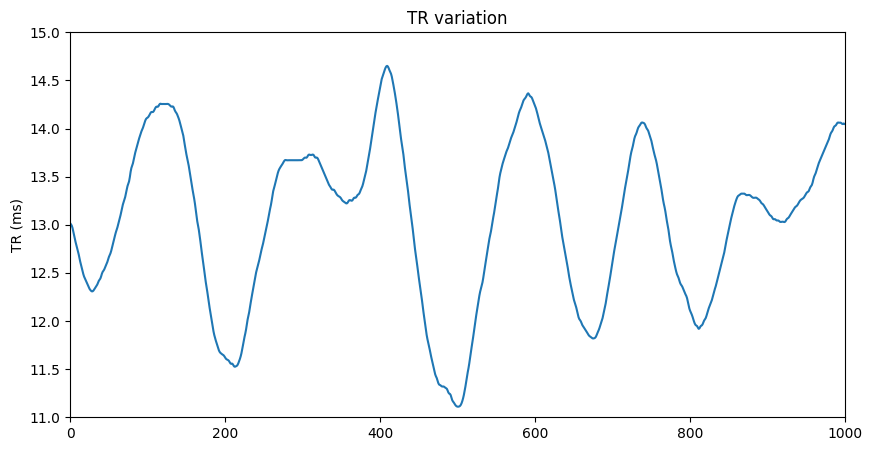

In [5]:
plt.rcParams['figure.figsize'] = [10, 5]

FISP_TR_raw = np.genfromtxt('./functions/holdArrays/FISP_TR_Jiang_REFINED.csv', delimiter=',')
# clean up data
# sort based on x-data to ensure data is in correct order
FISP_TR = FISP_TR_raw[FISP_TR_raw[:, 0].argsort()]
# remove first column
FISP_TR = FISP_TR[:,1]
plt.plot(FISP_TR)
plt.title('TR variation')
plt.ylabel('TR (ms)')
plt.ylim([11,15])
plt.xlim([0,1000])


(0.0, 1000.0)

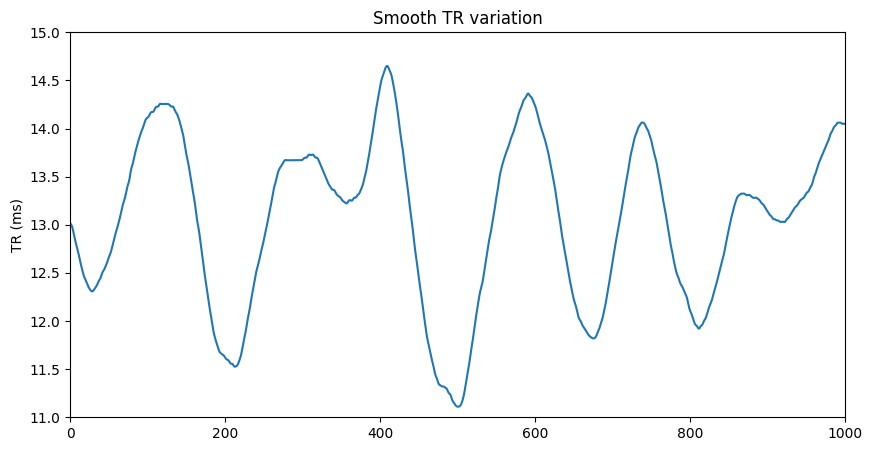

In [6]:
from scipy.signal import savgol_filter
smoothed_TR = savgol_filter(FISP_TR, window_length=5, polyorder=3)
plt.plot(smoothed_TR)
plt.title('Smooth TR variation')
plt.ylabel('TR (ms)')
plt.ylim([11,15])
plt.xlim([0,1000])

In [7]:
# Save to a npy file
np.save('./functions/holdArrays/FISP_TR_Jiang.npy', smoothed_TR)

Text(0, 0.5, 'TR (ms)')

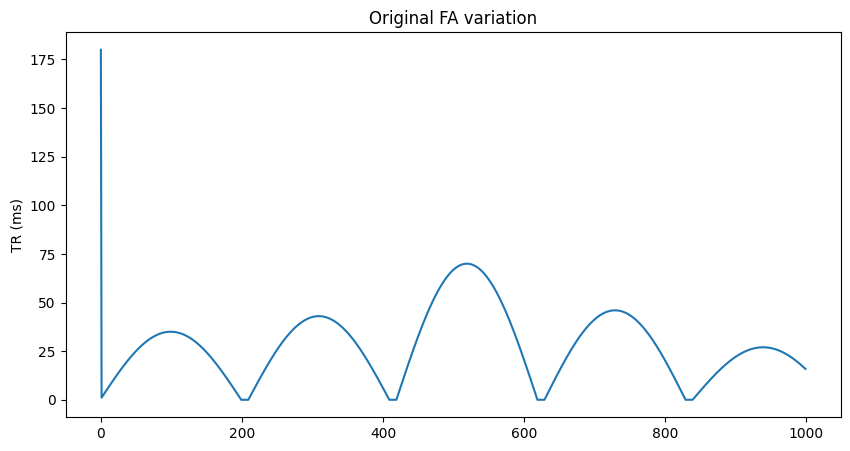

In [8]:
# Show original TR array from Emma's paper
trArrayOrig = np.load('./functions/holdArrays/faArray_3.npy')
plt.plot(trArrayOrig)
plt.title('Original FA variation')
plt.ylabel('TR (ms)')


In [9]:
# find the random seed that minimises the distance between the raw TR from the image and the perlin generated noise
target_signal = FISP_TR
no_seeds = 50000
best_seed = None
best_diff = np.Inf
from numpy.linalg import norm

#  create TR perlin noise variation 
no_TRs = 1000

for seed in range(1, no_seeds + 1):
    perlin = PerlinNoise(octaves=9, seed=seed)
    TR_var = np.array([perlin(i/no_TRs) for i in range(no_TRs)])
    # scale TR to our range
    min_TR = 11.5
    max_TR = 14.5
    TR_var = (TR_var-min(TR_var))/(max(TR_var)-min(TR_var))*(max_TR-min_TR)+min_TR

    diff = np.dot(TR_var, target_signal)/ (norm(TR_var)* norm(target_signal)) # cosine similarity

    # Update best seed if necessary
    if diff < best_diff:
        best_seed = seed
        best_diff = diff

print(f"Best seed: {best_seed} (Difference: {best_diff:.6f})")


KeyboardInterrupt: 

In [ ]:
Counter(trArrayOrig)

NameError: name 'Counter' is not defined

In [ ]:
a = 13#13
b = 80 #40

noOfRepetitions = 1000
xRange = np.array(range(noOfRepetitions))
Range = np.array(range(noOfRepetitions))
        #Calculate the sinusoidal array 
        #Sometimes a random variation is added to the flip angle to reduced 
        #effects of matching errors with inhomogeneous B1 fields 
        #Hence there is a random element that can be added (set currently to 0)
faArray = np.squeeze(a*(np.abs(3*np.sin(xRange/b)+(np.sin(xRange/b)**2))) \
            +  np.random.uniform(0,0,[1,noOfRepetitions]))


Text(0, 0.5, 'Flip Angle (degrees)')

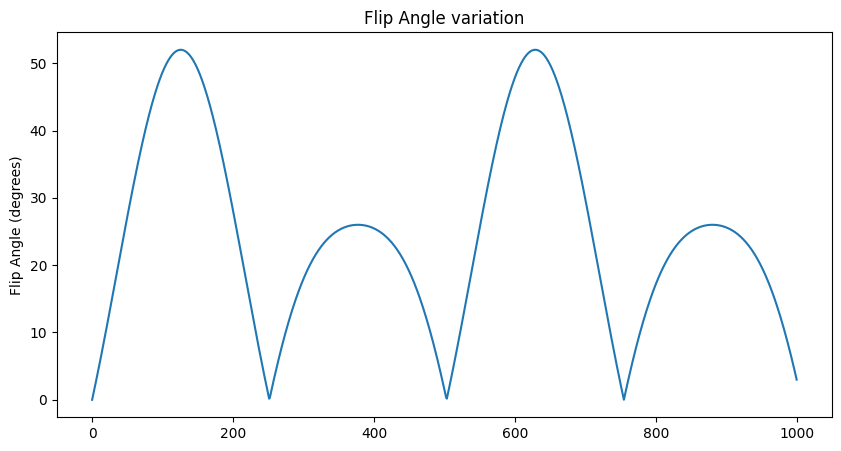

In [ ]:
plt.plot(faArray)
plt.title('Flip Angle variation')
plt.ylabel('Flip Angle (degrees)')

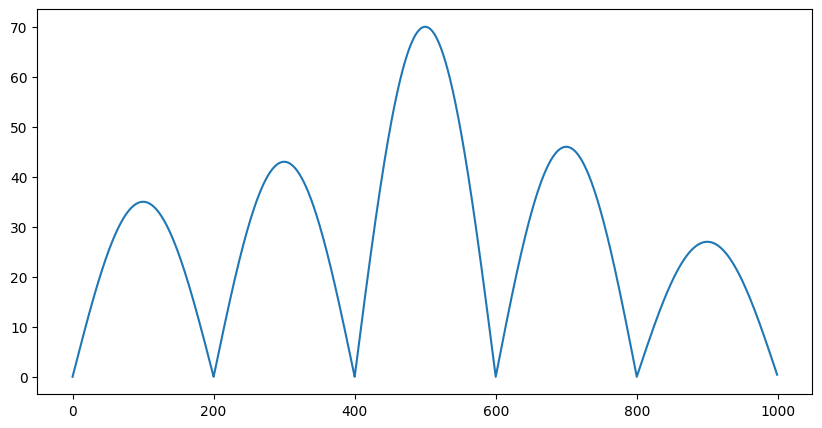

In [10]:
import random
Nrf = 200
cycles = noOfRepetitions/Nrf
faArray = []
#maxFA = random.sample(range(5,90),int(cycles)) # random sample of flip angles
maxFA = [35,43,70,46,27]
for i in range(int(cycles)):
    # Current random flip angle
    maxFA_i = maxFA[i]
    
    # Iterate through the segment
    for j in range(Nrf):
        # Calculate the flip angle
        flipAngle = np.sin(j*np.pi/Nrf)*maxFA_i
        # Append the flip angle to the array
        faArray.append(flipAngle)

plt.plot(faArray)

In [11]:
Nrf = 200+1
noOfRepetitions = 1000
cycles = noOfRepetitions/Nrf
faArray = []
#ßmaxFA = random.sample(range(5,90),int(cycles)) # random sample of flip angles
maxFA = [35,43,70,46,27] # values from the paper
for i in range(int(cycles)+1):
    # Current random flip angle
    maxFA_i = maxFA[i]
    # Iterate through the segment
    if i == 0:
        for j in range(5,Nrf-4):
            # Calculate the flip angle
            flipAngle = np.sin(j*np.pi/Nrf)*maxFA_i
            # Append the flip angle to the array
            faArray.append(flipAngle)
        faArray += [0,0,0,0,0,0]
    elif i > 0:
        faArray += [0,0,0,0,0,0]
        for j in range(5,Nrf-4):
            flipAngle = np.sin(j*np.pi/Nrf)*maxFA_i
            # Append the flip angle to the array
            faArray.append(flipAngle)
        faArray += [0,0,0,0,0]
    faArray = faArray[:1000]

In [1]:
plt.rcParams['figure.figsize'] = [9, 3]
plt.plot(faArray)
plt.ylim([0,75])
plt.xlim([0,1000])
faArray[0]
plt.xticks([0, 250, 500, 750, 1000])
plt.yticks([0, 25, 50, 75])

NameError: name 'plt' is not defined

Text(0.5, 1.0, 'FA Variation')

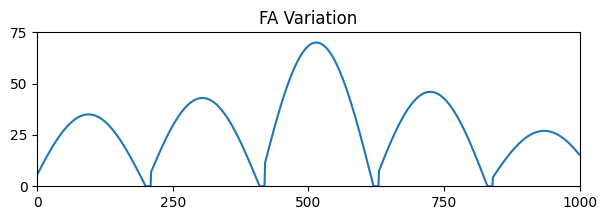

In [15]:
import numpy as np
import matplotlib.pyplot as plt
Nrf = 1000
# Initialize an empty list to hold the flip angles
faArray = []
# Calculate the number of full cycles
cycles = Nrf // 200
# Select a maximum flip angle from the list in paper
FAs = [35,43,70,46,27]
# Generate the flip angles
for i in range(cycles):
    # Select a random maximum flip angle between 5 and 90 degrees
    # Select a maximum flip angle from the list
    FAmax = FAs[i]
    # Generate the flip angles for this cycle
    for n in range(11, 211):
        FA = np.sin(n * np.pi / 211) * FAmax
        faArray.append(FA)
    # Add ten zero-degree flip angles between cycles
    np.array(faArray.extend([0] * 10))

# If Nrf is not a multiple of 210 (200 + 10), trim the array to the correct size
if len(faArray) > Nrf:
    faArray = faArray[:Nrf]
    
plt.rcParams['figure.figsize'] = [7, 2]
plt.plot(faArray)
plt.ylim([0,75])
plt.xlim([0,1000])
plt.xticks([0, 250, 500, 750, 1000])
plt.yticks([0, 25, 50, 75])
plt.title('FA Variation')

In [11]:
print(faArray[198:213])

[1.0420805051375053, 0.5210980111120617, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7.011085255508132, 7.641947071693464, 8.271114819885684]


https://cds.ismrm.org/protected/17MProceedings/PDFfiles/images/3580/ISMRM2017-003580_Fig1.png
look at FA variation here

[5.47121951935462, 5.942322772343848, 6.41319352128928, 6.8837155858794015, 7.353772871835348, 7.823249399555429, 8.292029332731358, 8.759997006929128, 9.22703695812748, 9.693033951206926, 10.157873008382285, 10.621439437571738, 11.083618860695374, 11.544297241896276, 12.00336091567716, 12.460696614945643, 12.916191498961187, 13.369733181176878, 13.821209756969118, 14.270509831248422, 14.717522545944481, 15.16213760735874, 15.604245313377712, 16.043736580540337, 16.480502970952692, 16.91443671904342, 17.345430758153263, 17.77337874695218, 18.198175095677456, 18.619714992186402, 19.0378944278172, 19.452610223051458, 19.86376005297223, 20.27124247251114, 20.674956941478463, 21.0748038493699, 21.470684539943953, 21.862501335563916, 22.25015756129836, 22.633557568774194, 23.012606759776517, 23.387211609589293, 23.75727969007115, 24.122719692460688, 24.48344144990551, 24.839355959709554, 25.1903754052932, 25.53641317786066, 25.87738389776943, 26.213203435596423, 26.543788932895666, 26.86905

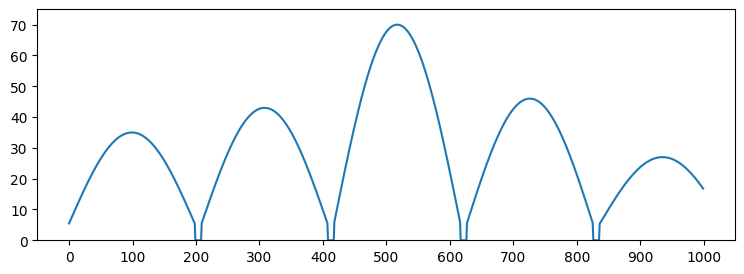

In [10]:
Nrf = 200
noOfRepetitions = 1000
cycles = noOfRepetitions/Nrf
faArray = []
min_angle = 5
#ßmaxFA = random.sample(range(5,90),int(cycles)) # random sample of flip angles
maxFA = [35-min_angle,43-min_angle,70-min_angle,46-min_angle,27-min_angle] # values from the paper
for i in range(int(cycles)):
    # Current random flip angle
    maxFA_i = maxFA[i]
    # Iterate through the segment
    for j in range(1,Nrf):
        # Calculate the flip angle
        flipAngle = np.sin(j*np.pi/Nrf)*maxFA_i
        # Append the flip angle to the array
        faArray.append(flipAngle+min_angle)
    faArray += [0,0,0,0,0,0,0,0,0,0]
faArray = faArray[:noOfRepetitions]

# THIS ONE WAS USED

plt.rcParams['figure.figsize'] = [9, 3]
plt.plot(faArray)
plt.ylim([0,75])
plt.xticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70])
print(faArray)

([<matplotlib.axis.YTick at 0x128729150>,
 [Text(0, 0, '0'),
  Text(0, 10, '10'),
  Text(0, 20, '20'),
  Text(0, 30, '30'),
  Text(0, 40, '40'),
  Text(0, 50, '50'),
  Text(0, 60, '60'),
  Text(0, 70, '70')])

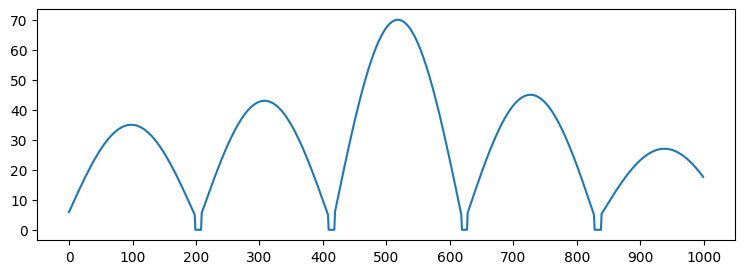

In [12]:
# paper actually has values for variation
fa_jiang = np.genfromtxt('fa_jiang', delimiter=',', dtype=float)

plt.plot(fa_jiang[0:1000])
plt.xticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70])



(0.0, 1000.0)

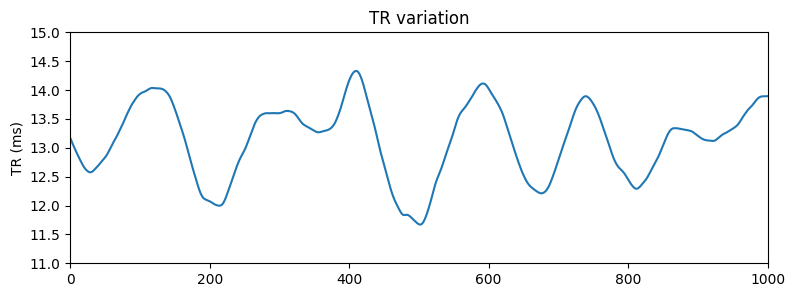

In [34]:
# paper actually has values for variation
fa_jiang = np.genfromtxt('tr_jiang', delimiter=',', dtype=float)

plt.plot(fa_jiang)
plt.title('TR variation')
plt.ylabel('TR (ms)')
plt.ylim([11,15])
plt.xlim([0,1000])


In [ ]:
plt.plot(fa_jiang-)
plt.title('TR variation')
plt.ylabel('TR (ms)')
plt.ylim([11,15])
plt.xlim([0,1000])

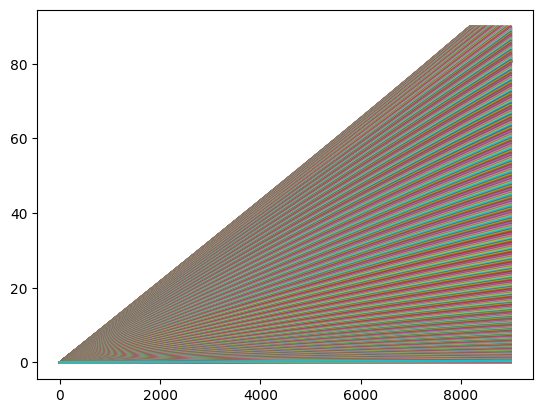

In [ ]:
plt.plot(sliceProfileArray)

In [21]:
import numpy as np
thetaX = np.array([1,2])
rotX = np.zeros([len(thetaX),3,3])
rotX

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [32]:

sin_thetaX,  cos_thetaX = np.sin(np.pi/32), np.cos(np.pi/32)
rotX[:, 0, 0] = np.cos(thetaX/2)**2
rotX[:, 0, 1] = -np.sin(thetaX/2)**2
rotX[:, 0, 2] = np.sin(thetaX)
rotX[:, 1, 0] = -np.sin(thetaX/2)**2
rotX[:, 2, 0] = -0.5* np.sin(thetaX)
rotX[:, 1, 1] = np.cos(thetaX/2)**2
rotX[:, 1, 2] = np.sin(thetaX)
rotX[:, 2, 1] = -0.5*np.sin(thetaX)
rotX[:, 2, 2] = np.cos(thetaX)

In [33]:
rotX

array([[[ 0.77015115, -0.22984885,  0.84147098],
        [-0.22984885,  0.77015115,  0.84147098],
        [-0.42073549, -0.42073549,  0.54030231]],

       [[ 0.29192658, -0.70807342,  0.90929743],
        [-0.70807342,  0.29192658,  0.90929743],
        [-0.45464871, -0.45464871, -0.41614684]]])

In [35]:
np.angle(0.2)

0.0

In [53]:
import numpy as np

def epg_rf(FpFmZ, alpha, phi=-np.pi/2):
    if abs(alpha) > 2 * np.pi:
        print("Warning: Flip angle should be in radians!")

    if phi is None:
        print("Warning: Rotation axis not specified - assuming -My")
        phi = -np.pi / 2

    # Rotation matrix
    RR = np.array([
        [(np.cos(alpha / 2)) ** 2, np.exp(2j * phi) * (np.sin(alpha / 2)) ** 2, -1j * np.exp(1j * phi) * np.sin(alpha)],
        [np.exp(-2j * phi) * (np.sin(alpha / 2)) ** 2, (np.cos(alpha / 2)) ** 2, 1j * np.exp(-1j * phi) * np.sin(alpha)],
        [-1j / 2 * np.exp(-1j * phi) * np.sin(alpha), 1j / 2 * np.exp(1j * phi) * np.sin(alpha), np.cos(alpha)]
    ])

    FpFmZ = np.matmul(RR, FpFmZ)

    return FpFmZ

def epg_grelax(FpFmZ, T1, T2, T, kg=0, D=0, Gon=1, noadd=0):
    if len(FpFmZ.shape) == 1:
        
        FpFmZ = FpFmZ.reshape((3, 1))


    if Gon == 1:
        if kg >= 0:
            advance_states_func = epg_grad
        else:
            advance_states_func = epg_mgrad

    if T1 is not None and T2 is not None:
        E2 = np.exp(-T / T2)
        E1 = np.exp(-T / T1)

        EE = np.diag([E2, E2, E1])
        RR = np.array([1 - E1])

        FpFmZ = np.matmul(EE, FpFmZ)
        FpFmZ[2, 0] += RR
        

    if kg > 0:
        Findex = np.arange(FpFmZ.shape[1])
        bvalZ = ((Findex) * kg) ** 2 * T

        bvalp = (((Findex + 0.5 * Gon) * kg) ** 2 + Gon * kg ** 2 / 12) * T
        bvalm = (((-Findex + 0.5 * Gon) * kg) ** 2 + Gon * kg ** 2 / 12) * T

        FpFmZ[0, :] *= np.exp(-bvalp * D)
        FpFmZ[1, :] *= np.exp(-bvalm * D)
        FpFmZ[2, :] *= np.exp(-bvalZ * D)

        BV = np.vstack((bvalp, bvalm, bvalZ))

    if Gon == 1:
        FpFmZ = advance_states_func(FpFmZ, noadd)

    return FpFmZ

def epg_grad(FpFmZ, noadd=0):
    if noadd == 0:
        FpFmZ = np.hstack((FpFmZ, np.zeros((3, 1))))  # Add higher dephased state.

    FpFmZ[0, :] = np.roll(FpFmZ[0, :], 1)  # Shift Fp states.
    FpFmZ[1, :] = np.roll(FpFmZ[1, :], -1)  # Shift Fm states.
    FpFmZ[1, -1] = 0  # Zero highest Fm state.
    FpFmZ[0, 0] = np.conj(FpFmZ[1, 0])  # Fill in lowest Fp state.

    return FpFmZ

def epg_mgrad(FpFmZ, noadd=0):
    if noadd == 0:
        FpFmZ = np.hstack((FpFmZ, np.zeros((3, 1))))  # Add higher dephased state.

    FpFmZ[1, :] = np.roll(FpFmZ[1, :], 1)  # Shift Fm states.
    FpFmZ[0, :] = np.roll(FpFmZ[0, :], -1)  # Shift Fp states.
    FpFmZ[0, -1] = 0  # Zero highest Fp state.
    FpFmZ[1, 0] = np.conj(FpFmZ[0, 0])  # Fill in lowest Fm state.

    return FpFmZ

def epg_fisp_mrf(RFpulses, TR_times, TE, T1, T2):
    Ntr = len(TR_times)  # Number of TRs
    Nstates = 20  # Number of states to simulate 

    P = np.zeros((3, Nstates))  # State matrix
    P[2, 0] = -1  # Equilibrium magnetization.

    dict = np.zeros(len(TR_times))  # Vector holding the received signals

    for k in range(Ntr):
        TR = TR_times[k]
        flipang = abs(RFpulses[k])
        flipphase = np.angle(RFpulses[k])

        P = epg_rf(P, flipang, flipphase)  # RF pulse

        # FID for time TE and then sample signal
        P = epg_grelax(P, T1, T2, TE, 0, 0, 0, 0)  # Relaxation.
        dict[k] = P[0, 0]  # Signal is F0 state.

        # -- Simulate relaxation and spoiler gradient
        P = epg_grelax(P, T1, T2, TR - TE, 1, 0, 1, 1)  # spoiler gradient, relaxation.

    return dict


In [54]:
dict = epg_fisp_mrf(np.radians(faArray), smoothed_TR, 2, 795, 60)

/var/folders/g0/5d6w6vqx2yv2b3fqgwsh6xfr0000gn/T/ipykernel_1464/2783079049.py:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  FpFmZ[2, 0] += RR
/var/folders/g0/5d6w6vqx2yv2b3fqgwsh6xfr0000gn/T/ipykernel_1464/2783079049.py:103: ComplexWarning: Casting complex values to real discards the imaginary part
  dict[k] = P[0, 0]  # Signal is F0 state.


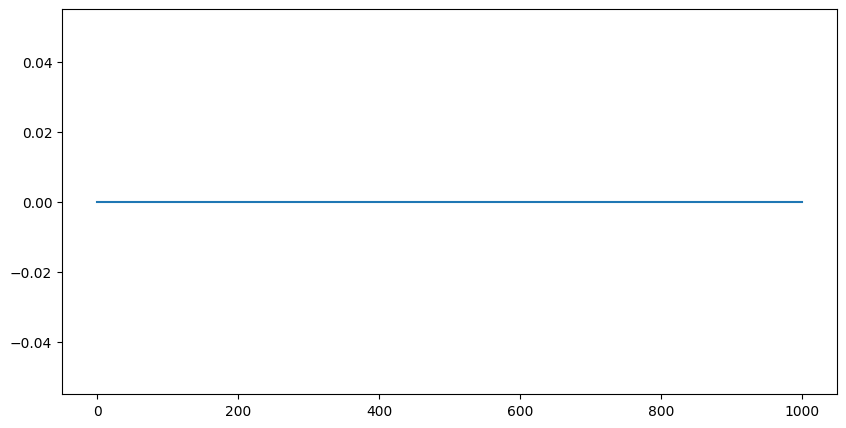

In [55]:
plt.plot(dict)

In [56]:
alpha = np.pi/4
phi = -np.pi/2
RR = np.array([
    [(np.cos(alpha / 2)) ** 2, np.exp(2j * phi) * (np.sin(alpha / 2)) ** 2, -1j * np.exp(1j * phi) * np.sin(alpha)],
    [np.exp(-2j * phi) * (np.sin(alpha / 2)) ** 2, (np.cos(alpha / 2)) ** 2, 1j * np.exp(-1j * phi) * np.sin(alpha)],
    [-1j / 2 * np.exp(-1j * phi) * np.sin(alpha), 1j / 2 * np.exp(1j * phi) * np.sin(alpha), np.cos(alpha)]
])

In [57]:
RR

array([[ 0.85355339+0.00000000e+00j, -0.14644661-1.79345371e-17j,
        -0.70710678-4.32978028e-17j],
       [-0.14644661+1.79345371e-17j,  0.85355339+0.00000000e+00j,
        -0.70710678+4.32978028e-17j],
       [ 0.35355339-2.16489014e-17j,  0.35355339+2.16489014e-17j,
         0.70710678+0.00000000e+00j]])

In [58]:
np.real(RR)

array([[ 0.85355339, -0.14644661, -0.70710678],
       [-0.14644661,  0.85355339, -0.70710678],
       [ 0.35355339,  0.35355339,  0.70710678]])

In [61]:
thetaX = np.pi/4
rotX = np.zeros([1,3,3])
rotX[:, 0, 0] = np.cos(thetaX/2)**2
rotX[:, 0, 1] = -np.sin(thetaX/2)**2
rotX[:, 0, 2] = np.sin(thetaX)
rotX[:, 1, 0] = -np.sin(thetaX/2)**2
rotX[:, 2, 0] = -0.5* np.sin(thetaX)
rotX[:, 1, 1] = np.cos(thetaX/2)**2
rotX[:, 1, 2] = np.sin(thetaX)
rotX[:, 2, 1] = -0.5*np.sin(thetaX)
rotX[:, 2, 2] = np.cos(thetaX)
rotX

array([[[ 0.85355339, -0.14644661,  0.70710678],
        [-0.14644661,  0.85355339,  0.70710678],
        [-0.35355339, -0.35355339,  0.70710678]]])